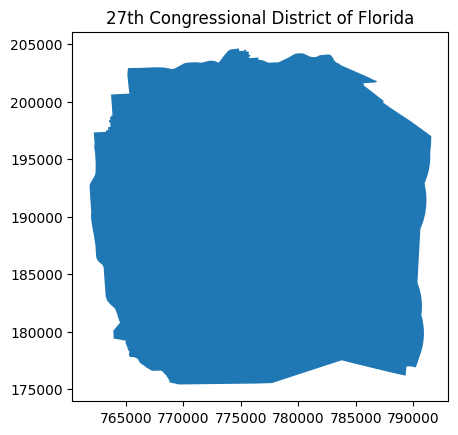

In [20]:
import geopandas as gpd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d # type: ignore
from shapely.geometry import Polygon, Point # type: ignore
import pandas as pd


# from https://fgdl.org/ords/r/prod/fgdl-current/catalog
shapefile_path = "./usdist_2022/usdist_2022.shp"
districts = gpd.read_file(shapefile_path)

district_27th = districts[districts['DISTRICT'] == '27']  # Replace 'DISTRICT' with the correct column name if different

district_27th.plot()

# Add a title and show the plot
plt.title("27th Congressional District of Florida")
plt.show()



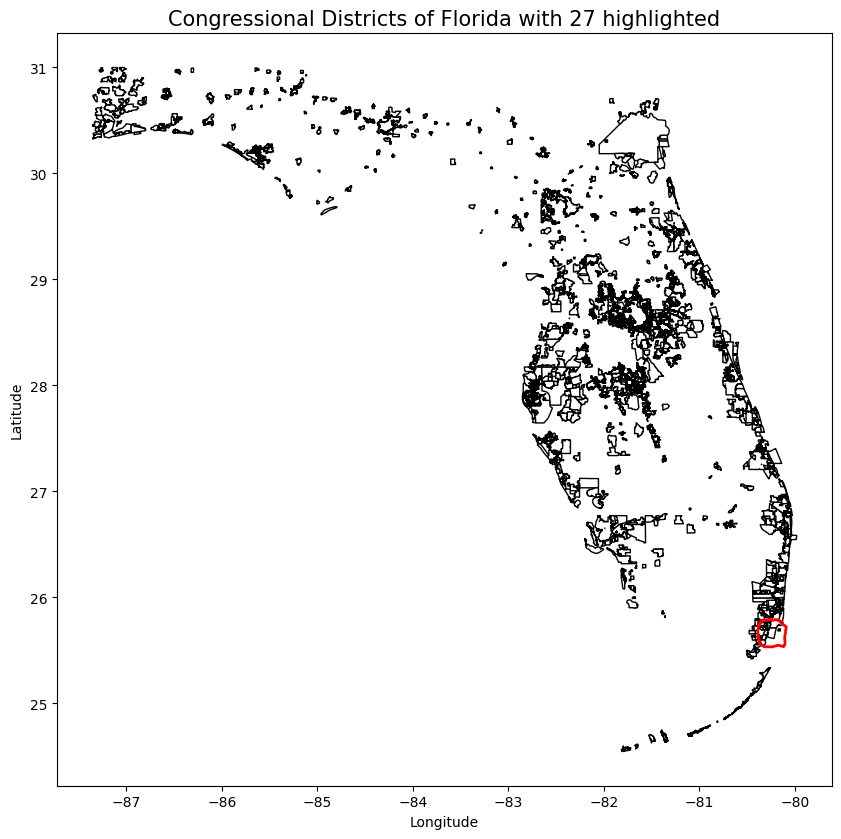

In [18]:
# from https://fgdl.org/ords/r/prod/fgdl-current/catalog
shapefile_path = "./tl_2023_12_place/tl_2023_12_place.shp"
bg_path = "./tl_2023_12_cd118/tl_2023_12_cd118.shp"

districts = gpd.read_file(shapefile_path)
gdf_background = gpd.read_file(bg_path)
district_27th = gdf_background[gdf_background['NAMELSAD'] == 'Congressional District 27']  



fig, ax = plt.subplots(figsize=(10, 10))

districts.plot(ax=ax, color='white', edgecolor='black')
district_27th.boundary.plot(ax=ax, color='red', linewidth=2, label='27th District')

# Add title and labels
ax.set_title('Congressional Districts of Florida with 27 highlighted', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/var/folders/k8/n45vj2517_db4bcwm7hjsqcr0000gn/T/ipykernel_30035/3490240120.py:41: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


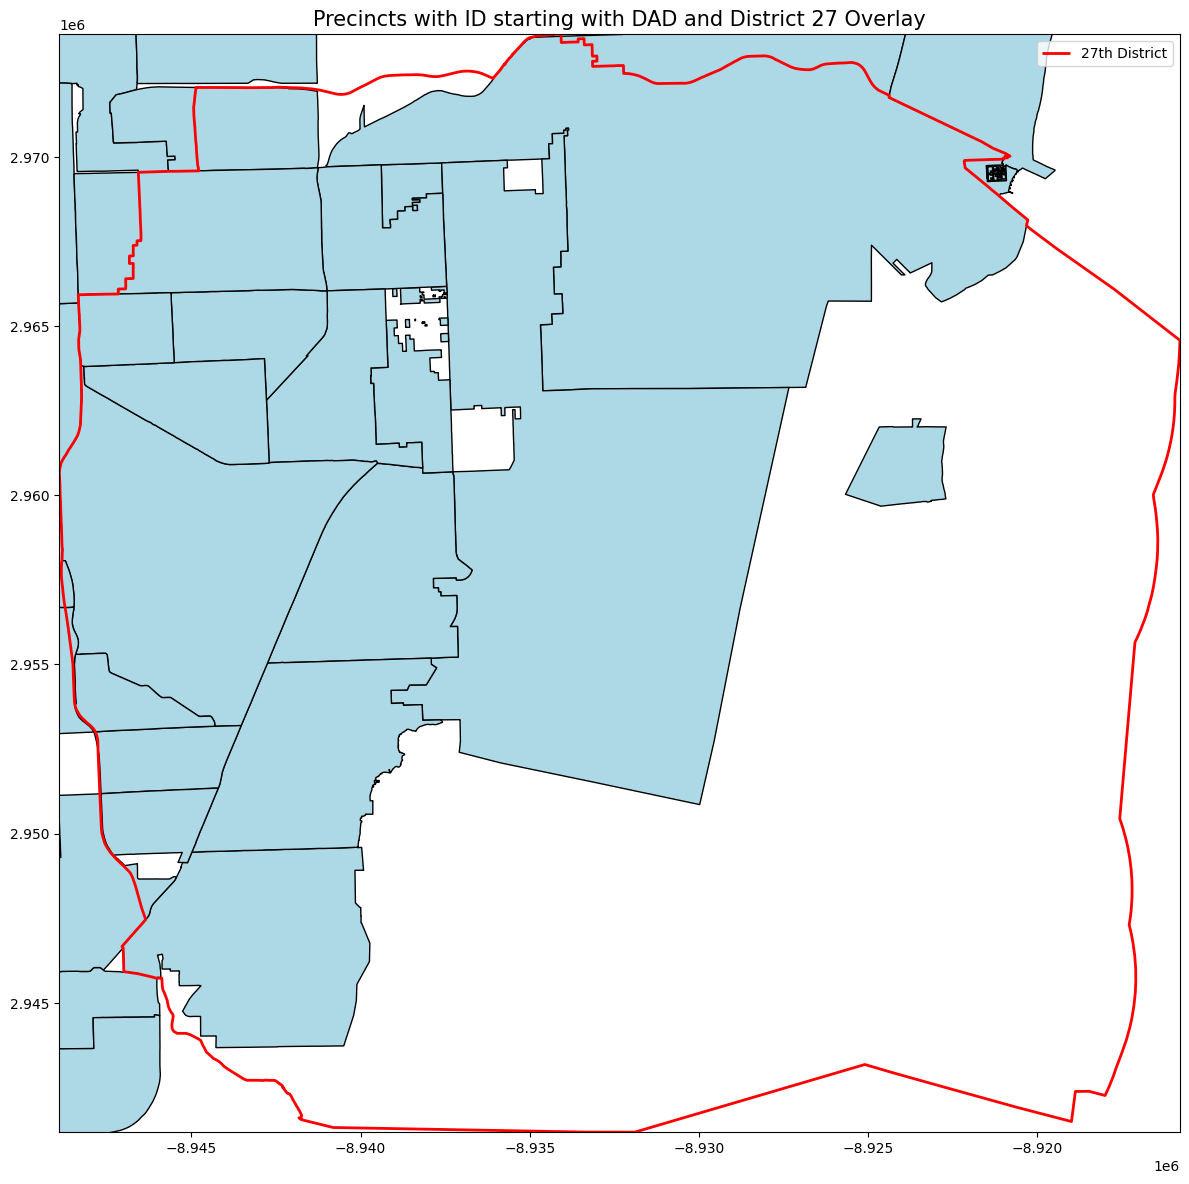

In [14]:
# from https://redistrictingdatahub.org/dataset/florida-2022-primary-election-precinct-level-results-and-boundaries/

# File paths (replace with your actual file paths)
bg_path = "./tl_2023_12_cd118/tl_2023_12_cd118.shp"
shapefile_path = "./tl_2023_12_place/tl_2023_12_place.shp"

# Load the precinct shapefile
gdf = gpd.read_file(shapefile_path)

# Load the background (27th district) shapefile
gdf_background = gpd.read_file(bg_path)
district_27th = gdf_background[gdf_background['NAMELSAD'] == 'Congressional District 27']  # Replace 'DISTRICT' with the correct column name

# Reproject both GeoDataFrames to the same projected CRS (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)
district_27th = district_27th.to_crs(epsg=3857)

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the precincts first
gdf.plot(ax=ax, color='lightblue', edgecolor='black', label='Precincts')

# Overlay the 27th district boundary on top of the precincts
district_27th.boundary.plot(ax=ax, color='red', linewidth=2, label='27th District')

# Annotate precincts with their ID
# for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['UNIQUE_ID']):
#     if zoom_x_min <= x <= zoom_x_max and zoom_y_min <= y <= zoom_y_max:
#         ax.text(x, y, label, fontsize=8, color='black')

# Set zoom limits based on the precinct bounds
zoom_x_min, zoom_x_max = district_27th.geometry.total_bounds[0]+1, district_27th.geometry.total_bounds[2]+1
zoom_y_min, zoom_y_max = district_27th.geometry.total_bounds[1]+1, district_27th.geometry.total_bounds[3]+1

ax.set_xlim([zoom_x_min, zoom_x_max])
ax.set_ylim([zoom_y_min, zoom_y_max])

# Add title and legend
ax.set_title('Precincts with ID starting with DAD and District 27 Overlay', fontsize=15)
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

   STATEFP CD118FP GEOID        GEOIDFQ                   NAMELSAD LSAD  \
0       12      22  1222  5001800US1222  Congressional District 22   C2   
1       12      23  1223  5001800US1223  Congressional District 23   C2   
2       12      01  1201  5001800US1201   Congressional District 1   C2   
3       12      02  1202  5001800US1202   Congressional District 2   C2   
4       12      24  1224  5001800US1224  Congressional District 24   C2   
5       12      03  1203  5001800US1203   Congressional District 3   C2   
6       12      25  1225  5001800US1225  Congressional District 25   C2   
7       12      04  1204  5001800US1204   Congressional District 4   C2   
8       12      26  1226  5001800US1226  Congressional District 26   C2   
9       12      05  1205  5001800US1205   Congressional District 5   C2   
10      12      27  1227  5001800US1227  Congressional District 27   C2   
11      12      06  1206  5001800US1206   Congressional District 6   C2   
12      12      28  1228 

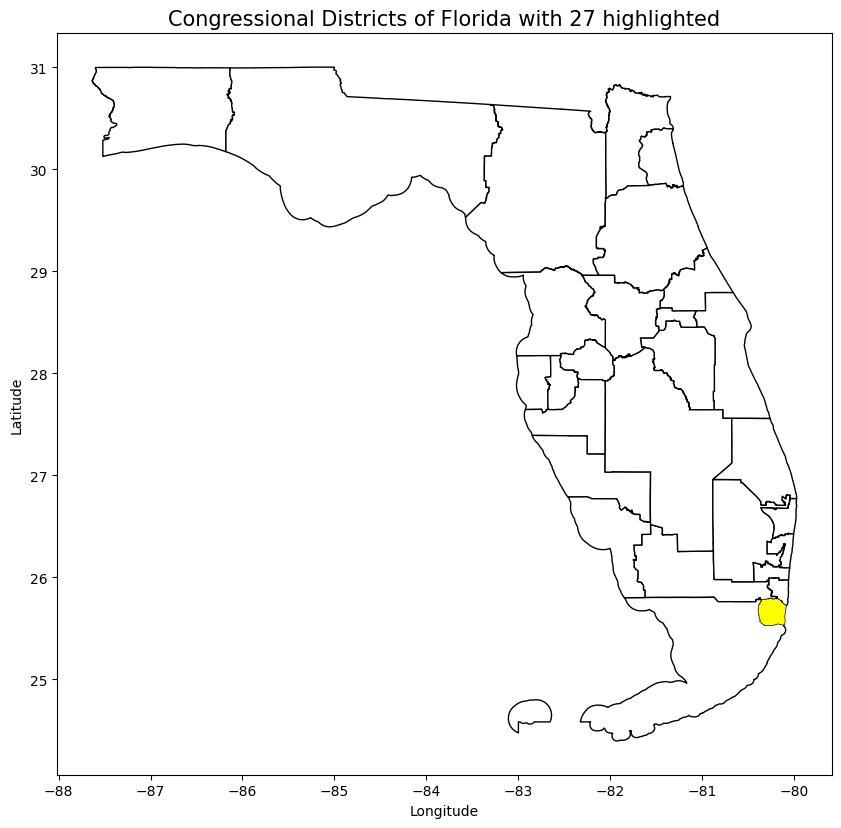

In [5]:
# from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2023&layergroup=Congressional+Districts+%28118%29
shapefile_path = "./tl_2023_12_cd118/tl_2023_12_cd118.shp"
districts = gpd.read_file(shapefile_path)
fig, ax = plt.subplots(figsize=(10, 10))
districts['27th_district'] = districts['NAMELSAD'] == 'Congressional District 27'

districts.plot(ax=ax, color='white', edgecolor='black')
districts[districts['27th_district']].plot(color='yellow', ax=ax)

# Add title and labels
ax.set_title('Congressional Districts of Florida with 27 highlighted', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

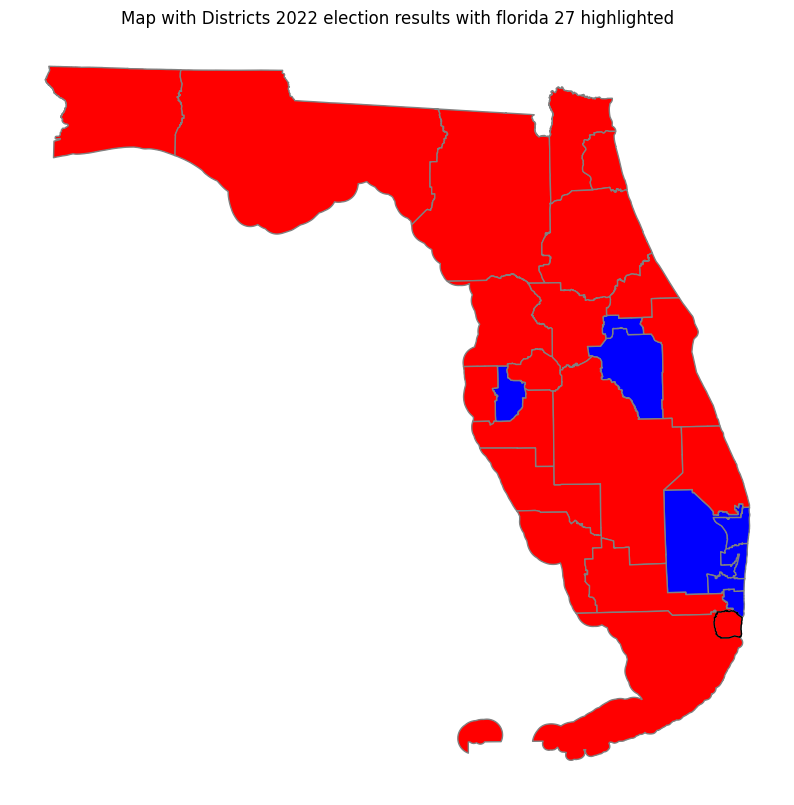

In [70]:
# Create a column to distinguish the district
districts['republicans'] = gdf_districts['PARTY'] == 'REPUBLICAN'

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf_districts[~gdf_districts['republicans']].plot(color='blue', edgecolor='grey', ax=ax)
gdf_districts[gdf_districts['republicans']].plot(color='red', edgecolor='grey', ax=ax)

gdf_districts['27th_district'] = gdf_districts['DISTRICT'] == '27'

gdf_districts[gdf_districts['27th_district']].plot(color='none', edgecolor='black', linewidth=1, ax=ax)

# Customize the plot (optional)
plt.title("Map with Districts 2022 election results with florida 27 highlighted")
plt.axis('off')  # Hide the axis ticks and labels

plt.show()

/var/folders/k8/n45vj2517_db4bcwm7hjsqcr0000gn/T/ipykernel_56015/2376991065.py:45: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


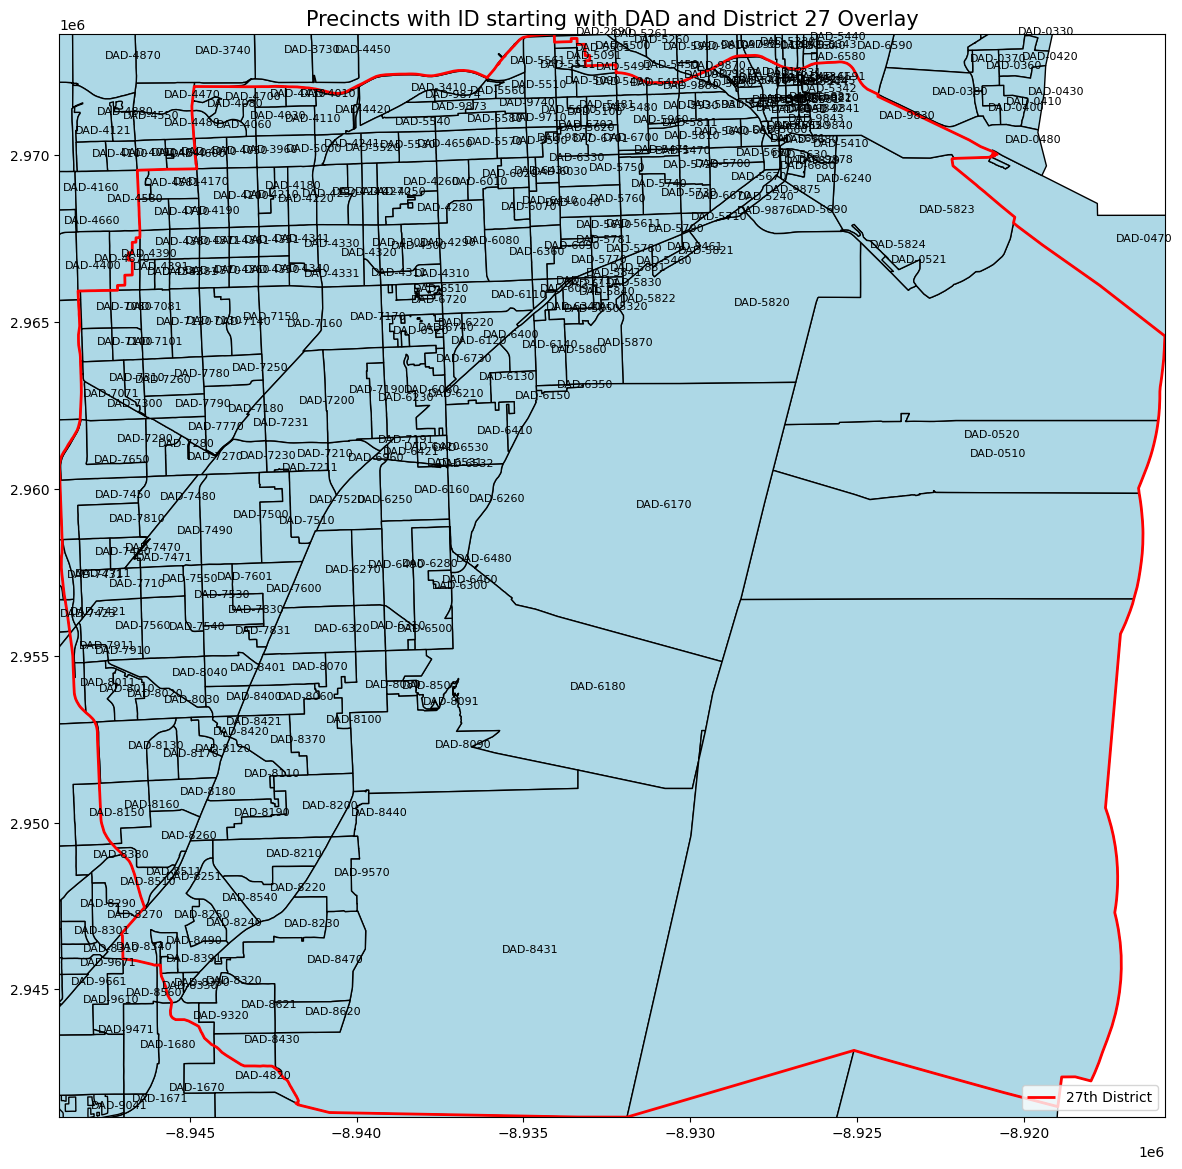

In [72]:
# from https://redistrictingdatahub.org/dataset/florida-2022-primary-election-precinct-level-results-and-boundaries/

# File paths (replace with your actual file paths)
shapefile_path = "./fl_prim_22_prec/fl_prim_22_st_prec/fl_prim_22_st_prec.shp"  # Replace with your shapefile path
bg_path = "./usdist_2022/usdist_2022.shp"

# Load the precinct shapefile
gdf = gpd.read_file(shapefile_path)

# Filter precincts with IDs starting with 'DAD'
gdf_dad = gdf[gdf['UNIQUE_ID'].str.startswith('DAD')]

# Load the background (27th district) shapefile
gdf_background = gpd.read_file(bg_path)
district_27th = gdf_background[gdf_background['DISTRICT'] == '27']  # Replace 'DISTRICT' with the correct column name

# Reproject both GeoDataFrames to the same projected CRS (EPSG:3857)
gdf_dad = gdf_dad.to_crs(epsg=3857)
district_27th = district_27th.to_crs(epsg=3857)

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the precincts first
gdf_dad.plot(ax=ax, color='lightblue', edgecolor='black', label='Precincts')

# Overlay the 27th district boundary on top of the precincts
district_27th.boundary.plot(ax=ax, color='red', linewidth=2, label='27th District')

# Annotate precincts with their ID
for x, y, label in zip(gdf_dad.geometry.centroid.x, gdf_dad.geometry.centroid.y, gdf_dad['UNIQUE_ID']):
    if zoom_x_min <= x <= zoom_x_max and zoom_y_min <= y <= zoom_y_max:
        ax.text(x, y, label, fontsize=8, color='black')

# Set zoom limits based on the precinct bounds
zoom_x_min, zoom_x_max = district_27th.geometry.total_bounds[0], district_27th.geometry.total_bounds[2]
zoom_y_min, zoom_y_max = district_27th.geometry.total_bounds[1], district_27th.geometry.total_bounds[3]

ax.set_xlim([zoom_x_min, zoom_x_max])
ax.set_ylim([zoom_y_min, zoom_y_max])

# Add title and legend
ax.set_title('Precincts with ID starting with DAD and District 27 Overlay', fontsize=15)
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()